<a href="https://colab.research.google.com/github/sristi-01/ROUTE-CREATION-DEVIATION-WITH-BUFFER/blob/master/Image_detection_with_high_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (50000, 32, 32, 3)
before [4]
after [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Epoch 1/20
50000/50000 [==============================] - 8s 165us/step - loss: 0.1062 - acc: 0.9000
Epoch 2/20
50000/50000 [==============================] - 8s 160us/step - loss: 0.1062 - acc: 0.9000
Epoch 3/20
50000/50000 [==============================] - 8s 163us/step - loss: 0.1062 - acc: 0.9000
Epoch 4/20
50000/50000 [==============================] - 9s 173us/step - loss: 0.1062 - acc: 0.9000
Epoch 5/20
50000/50000 [==============================] - 8s 163us/step - loss: 0.1062 - acc: 0.9000
Epoch 6/20
50000/50000 [==============================] - 8s 161us/step - loss: 0.1062 - acc: 0.9000
Epoch 7/20
50000/50000 [==============================] - 8s 158us/step - loss: 0.1062 - acc: 0.9000
Epoch 8/20
50000/50000 [==============================] - 8s 159us/step - loss: 0.1062 - acc: 0.9000
Epoch 9/20
50000/50000 [==============================] - 8s 158us/step - loss: 0.1062 - acc: 0.9000
Epoch 10

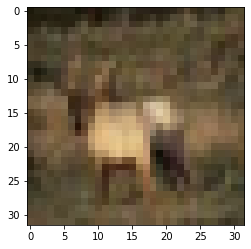

In [4]:
 import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
 from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
 
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import adam #RMSprop
import numpy as np
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
 
print('x_train shape:', x_train.shape)
 
import matplotlib.pyplot as plt
plt.imshow(x_train[3])
num_class=10
print("before",y_train[10])
#convert to categorical into binary
y_train=keras.utils.to_categorical(y_train,num_class)
y_test=keras.utils.to_categorical(y_test,num_class)
print("after",y_train[10])
x_train= x_train/255.0
y_train= y_train/255.0
input_shape = (32, 32, 3 )
batch_size = 128
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer= RMSprop(lr=0.001),metrics=['acc'])
model.fit(x_train,y_train,epochs=20)
model.evaluate(x_test, y_test)
model.summary()

In [18]:
 import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded =files.upload()
for fn in uploaded.keys():
   
    path = '/content/'+fn
    img = image.load_img(path, target_size=(32,32))
    x =  image.img_to_array(img)
    x =  np.expand_dims(x, axis=0)
    
    images= np.vstack([x])
    classes = model.predict(images,batch_size=10)
print(classes)
classes2 = np.argmax(classes,axis=1)
if classes2[0]==0:
   print("its aeroplane")
elif classes2[0]== 1:
       print("its automobile")
elif classes2[0]== 2:
       print("its bird")
elif classes2[0]== 3:
       print("its cat")
elif classes2[0]== 4:
       print("its deer")
elif classes2[0]== 5:
       print("its dog")
elif classes2[0]== 6:
       print("its frog")
elif classes2[0]== 7:
       print("its horse")
elif classes2[0]== 8:
       print("its ship")
elif classes2[0]== 9:
       print("its truck")
else:     
      print('cannt recognz')
print('done')

Saving 51036-cwobnirfka-1580816618.jpeg to 51036-cwobnirfka-1580816618.jpeg
[[0.04631565 0.04619126 0.03050311 0.34449163 0.03497493 0.27817813
  0.07556573 0.0547156  0.05193011 0.03713384]]
its cat
done


model = Sequential()model.add(Convolution2D(32,3,3 ,input_shape = (image_width,image_height,3)))
model.add(Activation('relu'))
model.add(Maxpooling2D(pool_size=(2,2))
 
model.add(Convolution2D(32,3,3, input_shape = (image_width,image_height,3)))
model.add(Activation('relu'))
model.add(Maxpooling2D(pool_size=(2,2))
 
model.add(Convolution2D(64,3,3 ,input_shape = (image_width,image_height,3)))
model.add(Activation('relu'))
model.add(Maxpooling2D(pool_size=(2,2))
 
model.add(Flatten())model.add(Dense(64))model.add(Activation('relu'))model.add(Dropout(0.5))model.add(Dense(1))model.add(Activation('sigmoid'))

 
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l2
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

In [ ]:
 
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l2
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness

In [ ]:
 run_test_harness()